# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
print(cities)

['fairbanks', 'sa kaeo', 'yanam', 'pisco', 'jamestown', 'stoyba', 'hithadhoo', 'port hedland', 'busselton', 'bafata', 'torbay', 'lolua', 'ushuaia', 'port elizabeth', 'luderitz', 'pando', 'tawang', 'parati', 'kunashak', 'richards bay', 'bokspits', 'taolanaro', 'itarema', 'kalmunai', 'moose factory', 'huarmey', 'dehui', 'saurimo', 'albany', 'bitung', 'leningradskiy', 'rikitea', 'puerto ayora', 'kapaa', 'bambous virieux', 'airai', 'hermanus', 'kodiak', 'lake havasu city', 'lorengau', 'dunn', 'kwinana', 'kahului', 'hilo', 'conceicao do araguaia', 'aswan', 'kovur', 'kastamonu', 'irbit', 'ponta do sol', 'thompson', 'punta arenas', 'hobart', 'port alfred', 'saint-philippe', 'huicheng', 'galle', 'strezhevoy', 'illoqqortoormiut', 'tasiilaq', 'camana', 'east london', 'bethel', 'tabuk', 'fortuna', 'muros', 'mataura', 'venezuela', 'kanniyakumari', 'auki', 'miri', 'meulaboh', 'cape town', 'baruun-urt', 'tiksi', 'mar del plata', 'tsihombe', 'tuktoyaktuk', 'georgetown', 'talnakh', 'upernavik', 'mwens

In [4]:
cities_20 = cities[0:20]
print(cities_20)
print(len(cities_20))

['fairbanks', 'sa kaeo', 'yanam', 'pisco', 'jamestown', 'stoyba', 'hithadhoo', 'port hedland', 'busselton', 'bafata', 'torbay', 'lolua', 'ushuaia', 'port elizabeth', 'luderitz', 'pando', 'tawang', 'parati', 'kunashak', 'richards bay']
20


In [5]:
#df = pd.DataFrame(cities_20)
df = pd.DataFrame(cities)
df=df.rename(columns={0:'City'})
df

,City
0,fairbanks
1,sa kaeo
2,yanam
3,pisco
4,jamestown
...,...
615,sint michiel
616,komsomolskiy
617,santa cruz cabralia
618,kushima


In [6]:
df['lat'] = ""
df['long'] = ""
df['temp'] = ""
df['humidity'] = ""
df['cloudiness'] = ""
df['windspeed'] = ""
df

,City,lat,long,temp,humidity,cloudiness,windspeed
0,fairbanks,,,,,,
1,sa kaeo,,,,,,
2,yanam,,,,,,
3,pisco,,,,,,
4,jamestown,,,,,,
...,...,...,...,...,...,...,...
615,sint michiel,,,,,,
616,komsomolskiy,,,,,,
617,santa cruz cabralia,,,,,,
618,kushima,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="

city=cities
#city=cities_20



In [8]:
for i, row in df.iterrows():
    city=row[0]
    
    response = requests.get(query_url + city).json()
    try:
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        windspeed = response['wind']['speed']
           
        df.loc[i, "lat"] = lat
        df.loc[i, "long"] = long
        df.loc[i, "temp"] = temp
        df.loc[i, "humidity"] = humidity
        df.loc[i, "cloudiness"] = cloudiness
        df.loc[i, "windspeed"] = windspeed

    except:
        print(city)
        print(response)

df.head(20)

stoyba
{'cod': '404', 'message': 'city not found'}
lolua
{'cod': '404', 'message': 'city not found'}
bokspits
{'cod': '404', 'message': 'city not found'}
taolanaro
{'cod': '404', 'message': 'city not found'}
illoqqortoormiut
{'cod': '404', 'message': 'city not found'}
tsihombe
{'cod': '404', 'message': 'city not found'}
xiongshi
{'cod': '404', 'message': 'city not found'}
sorvag
{'cod': '404', 'message': 'city not found'}
wahran
{'cod': '404', 'message': 'city not found'}
warqla
{'cod': '404', 'message': 'city not found'}
vaitupu
{'cod': '404', 'message': 'city not found'}
louisbourg
{'cod': '404', 'message': 'city not found'}
saleaula
{'cod': '404', 'message': 'city not found'}
azimur
{'cod': '404', 'message': 'city not found'}
yusva
{'cod': '404', 'message': 'city not found'}
aflu
{'cod': '404', 'message': 'city not found'}
tubruq
{'cod': '404', 'message': 'city not found'}
khonuu
{'cod': '404', 'message': 'city not found'}
kinanah
{'cod': '404', 'message': 'city not found'}
kuche
{'

,City,lat,long,temp,humidity,cloudiness,windspeed
0,fairbanks,64.8378,-147.716,6.03,68,1,3.09
1,sa kaeo,13.75,102.333,31.92,57,90,3.68
2,yanam,16.7333,82.2167,37.92,53,83,4.78
3,pisco,-13.7,-76.2167,16.21,88,20,1.54
4,jamestown,42.097,-79.2353,5.54,93,1,1.54
5,stoyba,,,,,,
6,hithadhoo,-0.6,73.0833,26.78,86,100,8.68
7,port hedland,-20.3167,118.567,25.18,69,0,1.54
8,busselton,-33.65,115.333,15.58,63,77,6.39
9,bafata,12.1667,-14.75,33.13,47,91,1.29


In [22]:
df.to_csv("cities_data_.csv", index = False)
df.head()
df.dtypes
df[['lat','long', 'temp', 'humidity', 'cloudiness', 'windspeed']]=df[['lat','long', 'temp', 'humidity', 'cloudiness', 'windspeed']].apply(pd.to_numeric)
df.dtypes

City           object
lat           float64
long          float64
temp          float64
humidity      float64
cloudiness    float64
windspeed     float64
dtype: object

In [23]:
df.loc[df['humidity']>=100]

,City,lat,long,temp,humidity,cloudiness,windspeed
171,avarua,-21.2078,-159.7750,23.06,100.0,75.0,0.51
430,santarem,-2.4431,-54.7083,24.97,100.0,40.0,1.03
432,gatesville,31.4352,-97.7439,16.36,100.0,75.0,0.00


In [26]:
df.drop(labels=[171,430,432], axis=0, inplace=True)


KeyError: '[171 430 432] not found in axis'

In [30]:
df.iloc[170:]
df.reset_index()
df.iloc[170:]

,City,lat,long,temp,humidity,cloudiness,windspeed
170,kaniama,-7.5667,24.1833,28.69,38.0,2.0,1.37
172,lebu,-37.6167,-73.6500,11.37,88.0,97.0,1.92
173,caravelas,-17.7125,-39.2481,23.57,74.0,25.0,1.97
174,el cope,8.6167,-80.6000,21.58,93.0,98.0,2.23
175,manggar,-2.8833,108.2667,27.51,82.0,100.0,3.78
...,...,...,...,...,...,...,...
615,sint michiel,NaN,NaN,NaN,NaN,NaN,NaN
616,komsomolskiy,40.4272,71.7189,28.29,17.0,1.0,3.09
617,santa cruz cabralia,-16.2781,-39.0247,21.92,77.0,0.0,2.17
618,kushima,31.4583,131.2333,20.11,92.0,99.0,1.86


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

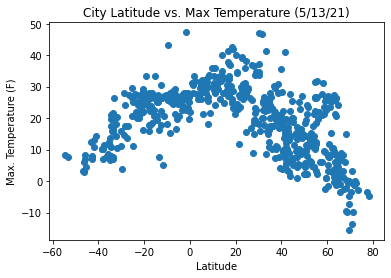

In [41]:
latitude=df.iloc[:, 1]
temperature=df.iloc[:, 3]


# Plot
plt.scatter(latitude, temperature)
plt.title('City Latitude vs. Max Temperature (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

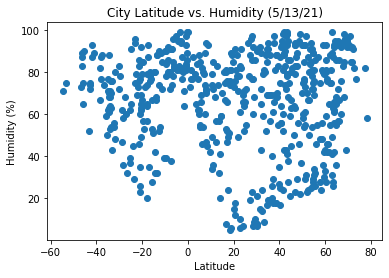

In [42]:
humidity=df.iloc[:,4]
plt.scatter(latitude,humidity)
plt.title('City Latitude vs. Humidity (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

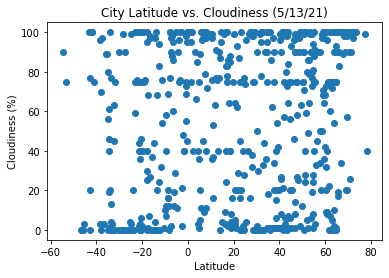

In [44]:
cloud = df.iloc[:,5]
plt.scatter(latitude,cloud)
plt.title('City Latitude vs. Cloudiness (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

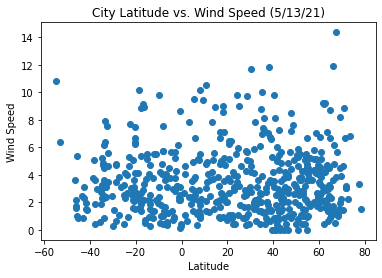

In [45]:
wind=df.iloc[:,6]
plt.scatter(latitude,wind)
plt.title('City Latitude vs. Wind Speed (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression